### Cleaning-up the notebook

> * 모든 확인 과정이 끝났으므로 하나의 완성본('unsupervisedAnalysis.ipynb')으로 정리한다.
>> - 모듈, 패키지 등의 호출 구문은 맨 위로 모은다.
>> - 분석 단위마다 제목을 달아 가독성을 높인다.

## Unsupervised Analysis of Days of Week

Treating crossing each day as features to learn about the relationship between various days

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [28]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

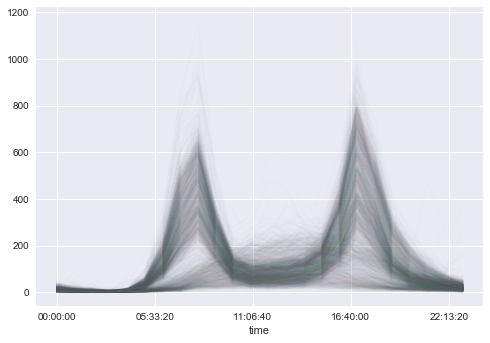

In [29]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.plot(legend = False, alpha = 0.01);

## Principal Component Analysis

In [30]:
X = pivoted.fillna(0).T.values
X.shape

(2036, 24)

In [31]:
#import sklearn
#sklearn.__version__

In [32]:
X2 = PCA(2, svd_solver = 'full').fit_transform(X)
X2.shape

(2036, 2)

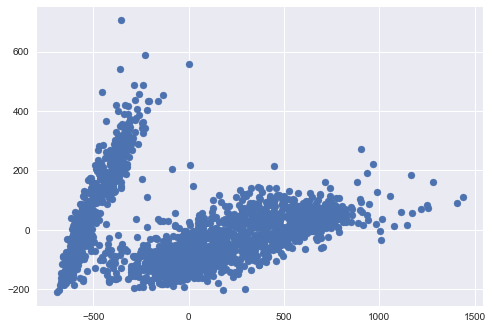

In [33]:
plt.scatter(X2[:, 0], X2[:, 1]);

## Unsupervised Clustering

In [34]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

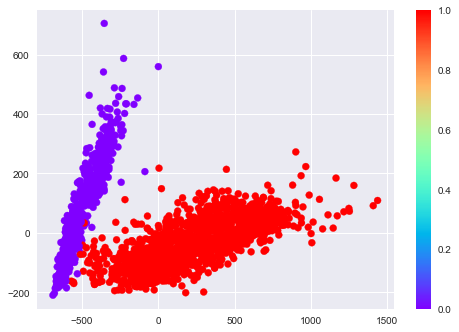

In [35]:
plt.scatter(X2[:, 0], X2[:, 1], c = labels, cmap = 'rainbow');
plt.colorbar();

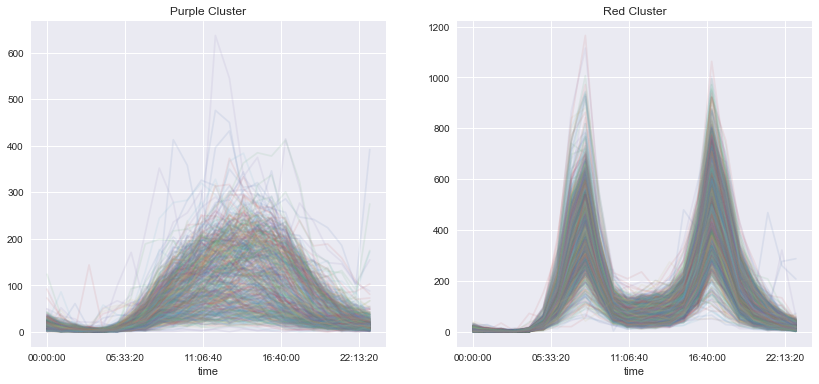

In [38]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))

pivoted.T[labels == 0].T.plot(legend = False, alpha = 0.1, ax = ax[0]);
pivoted.T[labels == 1].T.plot(legend = False, alpha = 0.1, ax = ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## Comparing with Day of Week

In [39]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

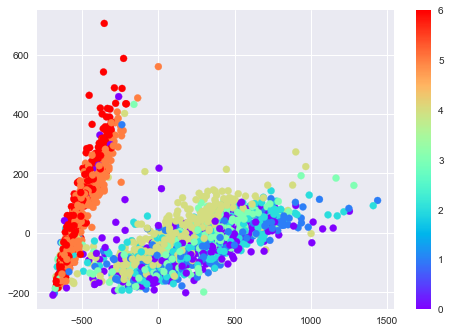

In [40]:
plt.scatter(X2[:, 0], X2[:, 1], c = dayofweek, cmap = 'rainbow');
plt.colorbar();

## Analyzing Outliers

The following points are weekdays with a holiday-like pattern

In [41]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-23', '2018-04-24', '2018-04-25', '2018-04-26',
               '2018-04-27', '2018-04-30'],
              dtype='datetime64[ns]', length=1405, freq=None)

2017년 2월 6일은 무슨 일이 있었던거야?